# Decision Trees

on the penguin dataset

based on file created by Kristian Rother

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

### Preparations

In [3]:
df = pd.read_csv('input_data/all_penguins_clean.csv', index_col=0)
df.dropna(inplace=True)

#### 1. Inspect the size of the dataset

In [7]:
print(df.shape)
df.head(2)

(334, 14)


,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
studyName,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE


#### 2. Select the Species column to use as target

In [8]:
y = df[['Species']]

#### 3. Select two columns to use as input features

In [15]:
X = df[['Culmen Depth (mm)', 'Culmen Length (mm)']]

#### 4. Plot the data

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

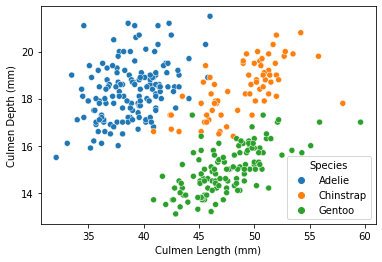

In [16]:
sns.scatterplot(x=X['Culmen Length (mm)'], y=X['Culmen Depth (mm)'], hue=y['Species'])

## Decision Tree from Scratch

#### 5. Make one prediction for every penguin

In [17]:
# Culmen Length Treshold 
CLT = 42

# Culmen Depth Treshold
CDT = 16.5

predictions = []
for i, row in X.iterrows():
    # i: index, row: values of a row as a pd.Series
    if row['Culmen Length (mm)'] < CLT:
        predictions.append('Adelie')
    else:
        if row['Culmen Depth (mm)'] < CDT:
            predictions.append('Gento')
        else:
            predictions.append('Chinstrap')

#### 6. Calculate the accuracy of the model

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(predictions, y.values.ravel())

0.5838323353293413

## Find the optimal separation with Scikit

#### 7. Train the model

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [22]:
m = DecisionTreeClassifier(max_depth=2)  # we allow that many questions
m.fit(X, y)

DecisionTreeClassifier(max_depth=2)

#### 8. Make predictions

In [23]:
ypred = m.predict(X)

#### 9. Calculate the accuracy

In [24]:
accuracy_score(ypred, y.values.ravel())

0.9341317365269461

## Plot the tree

#### 10. Plot the tree with according labels

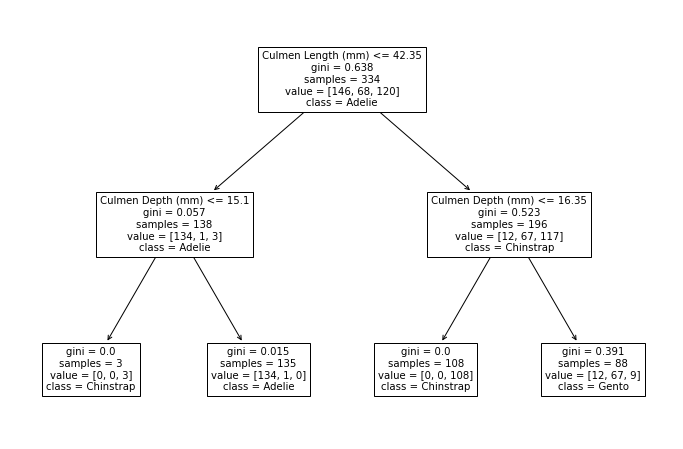

In [25]:
plt.figure(figsize=(12, 8))
t = plot_tree(m, feature_names=['Culmen Depth (mm)', 'Culmen Length (mm)'], class_names=['Adelie', 'Gento', 'Chinstrap'])

[Text(167.4, 190.26, 'X[0] <= 0.5\ngini = 0.481\nsamples = 668\nvalue = [399, 269]'),
 Text(83.7, 135.9, 'X[2] <= 2.5\ngini = 0.37\nsamples = 241\nvalue = [59, 182]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 3.0\ngini = 0.11\nsamples = 137\nvalue = [8, 129]'),
 Text(20.925, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.098\nsamples = 135\nvalue = [7, 128]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 36.5\ngini = 0.5\nsamples = 104\nvalue = [51, 53]'),
 Text(104.625, 27.180000000000007, 'gini = 0.497\nsamples = 96\nvalue = [44, 52]'),
 Text(146.475, 27.180000000000007, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 6.5\ngini = 0.324\nsamples = 427\nvalue = [340, 87]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(230

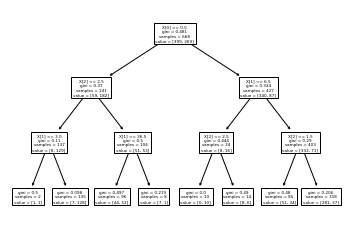

In [49]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder


titanic_df = pd.read_csv('input_data/train.csv')
titanic_df.head(2)

X_train, X_test, y_train, y_test = train_test_split(
    titanic_df[['Sex', 'Age', 'Pclass']],
    titanic_df[['Survived']],
    test_size=0.25,
)

def prepare_data(X):
    one_hot = OneHotEncoder(sparse=False, drop='first')
    one_hot.fit(X[['Sex']])
    X['Sex'] = one_hot.transform(X[['Sex']])

    # Age - Imput
    iter_imp = IterativeImputer(initial_strategy='median', imputation_order='random')
    iter_imp.fit(X[['Age', 'Sex']])
    X['Age'] = iter_imp.transform(X[['Age', 'Sex']])

    return X

X_train = prepare_data(X_train)

m = DecisionTreeClassifier(max_depth=3)  # we allow that many questions
m.fit(X_train, y_train)
y_pred = m.predict(X_train)
accuracy_score(y_pred, y_train.values.ravel())
plot_tree(m)